In [81]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [65]:
def get_data(sasa_data_file):
    df = pd.read_csv(sasa_data_file, delimiter=' ').iloc[:, 1:]
    df.columns = ['frame', 'hydrophobic', 'hydrophilic', 'total']
    df['frame'] = df['frame'].apply(lambda x: x.strip(':'))
    df = df.astype(np.float32)
    df = df.iloc[:-1,]
    return df 

In [110]:
df = get_data('4XYK_SASA.dat')
df2 = get_data('../2_apo_4XYJ_MD/4XYJ_SASA.dat')

In [116]:
df_total = pd.DataFrame(columns=['4XYK', '4XYJ'])
df_total['4XYK'] = get_data('4XYK_SASA.dat').iloc[:,3:]
df_total['4XYJ'] = get_data('../2_apo_4XYJ_MD/4XYJ_SASA.dat').iloc[:,3:]

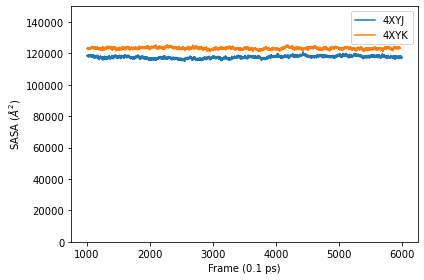

In [124]:
sns.lineplot(data=df, x='frame', y='total', label='4XYJ')
sns.lineplot(data=df2, x='frame', y='total', label='4XYK')
plt.ylabel('SASA ($\AA^2$)')
plt.xlabel('Frame (0.1 ps)')
plt.legend()
plt.ylim(0, 150000)
plt.tight_layout()
plt.savefig('./figures/sasa_1.png', dpi=300)

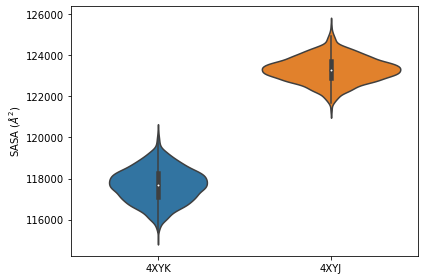

In [125]:
sns.violinplot(data=df_total)
plt.ylabel('SASA ($\AA^2$)')
plt.tight_layout()
plt.savefig('./figures/sasa_2.png', dpi=300)